In [1]:
import tweepy
import csv #Import csv

with open('../credentials.txt', 'r') as credentials:
    credentials.readline()
    api_key = credentials.readline().rstrip()
    api_key_secret = credentials.readline().rstrip()
    credentials.readline()
    access_token = credentials.readline().rstrip()
    access_token_secret = credentials.readline().rstrip()


In [2]:
auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [9]:
# Open/create a file to append data to
csvFile = open('../dataset/prova.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

tweets = []
ratios = []

for tweet in tweepy.Cursor(api.search,
                           q = "from:trovaricetta AND -filter:retweets AND -filter:replies",
                           until='2020-01-18',
                           tweet_mode='extended').items():

    tweets.append(tweet)

    if tweet.user.followers_count == 0:
        continue

    ratio = (tweet.favorite_count) / tweet.user.followers_count
    ratios.append(ratio)

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.user.name, tweet.created_at, tweet.full_text,tweet.retweet_count, tweet.favorite_count])
csvFile.close()

print(ratios)

[5.745805561939784e-05, 3.8305370412931895e-05, 7.661074082586379e-05, 5.745805561939784e-05, 3.8305370412931895e-05, 9.576342603232973e-05, 7.661074082586379e-05, 0.00011491611123879568, 0.0, 5.745805561939784e-05, 0.0, 9.576342603232973e-05, 0.0, 3.8305370412931895e-05, 0.0, 5.745805561939784e-05, 0.00015322148165172758, 1.9152685206465947e-05, 0.0, 0.0, 1.9152685206465947e-05, 1.9152685206465947e-05, 5.745805561939784e-05, 1.9152685206465947e-05, 0.0, 5.745805561939784e-05, 5.745805561939784e-05, 0.0, 5.745805561939784e-05, 0.0001723741668581935, 3.8305370412931895e-05, 1.9152685206465947e-05, 1.9152685206465947e-05, 1.9152685206465947e-05, 0.0001723741668581935, 0.0, 3.8305370412931895e-05, 3.8305370412931895e-05, 0.00011491611123879568, 1.9152685206465947e-05, 9.576342603232973e-05, 5.745805561939784e-05, 0.0, 1.9152685206465947e-05, 1.9152685206465947e-05, 1.9152685206465947e-05, 3.8305370412931895e-05, 0.0, 0.0, 3.8305370412931895e-05, 1.9152685206465947e-05, 5.745805561939784e-

In [10]:
len(tweets)

122

In [ ]:
tweet

In [44]:
date = []
retweet_count = []

for tweet in tweets:
    print(tweet.created_at, tweet.retweet_count)
    date.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    

2020-01-17 16:17:07 2
2020-01-17 15:47:11 1
2020-01-17 15:17:07 3
2020-01-17 14:47:21 1
2020-01-17 14:17:07 1
2020-01-17 11:47:12 4
2020-01-17 11:17:06 4
2020-01-17 10:47:11 6
2020-01-17 10:17:06 4
2020-01-17 09:47:22 3
2020-01-17 09:17:06 3
2020-01-17 08:47:12 4
2020-01-17 08:17:06 1
2020-01-17 07:47:19 2
2020-01-17 07:17:07 3
2020-01-16 18:17:05 3
2020-01-16 17:47:22 5
2020-01-16 17:17:07 1
2020-01-16 16:17:05 0
2020-01-16 15:47:12 2
2020-01-16 15:17:07 2
2020-01-16 14:47:21 2
2020-01-16 14:17:05 3
2020-01-16 13:47:12 0
2020-01-16 13:17:06 1
2020-01-16 12:47:20 5
2020-01-16 12:17:05 1
2020-01-16 11:47:12 0
2020-01-16 11:17:06 3
2020-01-16 10:17:06 6
2020-01-16 09:47:21 4
2020-01-16 09:17:05 2
2020-01-16 08:47:11 4
2020-01-16 08:17:05 1
2020-01-16 07:47:16 5
2020-01-16 07:17:06 3
2020-01-15 18:17:05 4
2020-01-15 17:47:22 4
2020-01-15 17:17:07 6
2020-01-15 15:17:05 3
2020-01-15 14:47:21 5
2020-01-15 14:17:06 3
2020-01-15 13:47:11 0
2020-01-15 13:17:06 0
2020-01-15 12:47:20 0
2020-01-15

In [54]:
%matplotlib inline

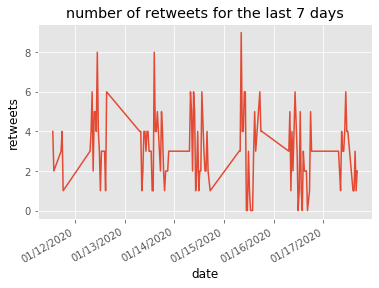

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.xlabel('date', color='black')
plt.ylabel('retweets', color='black')
plt.title('number of retweets for the last 7 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(date,retweet_count)
plt.gcf().autofmt_xdate()
plt.savefig('test.jpg')